**EXPLORATORY DATA ANALYSIS ON AIRPLANE ROUTE DATASETS**




In [ ]:
%%capture
!pip install networkx==2.3

In [ ]:
import pandas as pd
import networkx as nx
#%matplotlib notebook
import matplotlib.pyplot as plt
import os
import operator
import warnings
warnings.filterwarnings('ignore')




In [ ]:
G_df = pd.read_csv('/content/routes1.csv')
cols_list=["Airport ID","City","Country","IATA"]
airport_df = pd.read_csv('/content/airports.csv',usecols=cols_list)

In [ ]:
G_df.head(2)

,Airline,Airline ID,Source airport ID,Source airport,Destination airport ID,Destination airport,Codeshare,Stops,Equipment,Price,Source,Destination,Date_of_Journey
0,IndiGo,2B,410,AER,2965,KZN,2990,0.0,CR2,3897.0,Banglore,New Delhi,24/03/2019
1,Air India,2B,410,ASF,2966,KZN,2990,0.0,CR2,7662.0,Kolkata,Banglore,1/05/2019


In [ ]:
airport_df.head(2)

,Airport ID,City,Country,IATA
0,1,Goroka,Papua New Guinea,GKA
1,2,Madang,Papua New Guinea,MAG


In [ ]:
G_draw = nx.from_pandas_edgelist(G_df.head(1000), 'Source airport ', 'Destination airport ',create_using=nx.DiGraph())

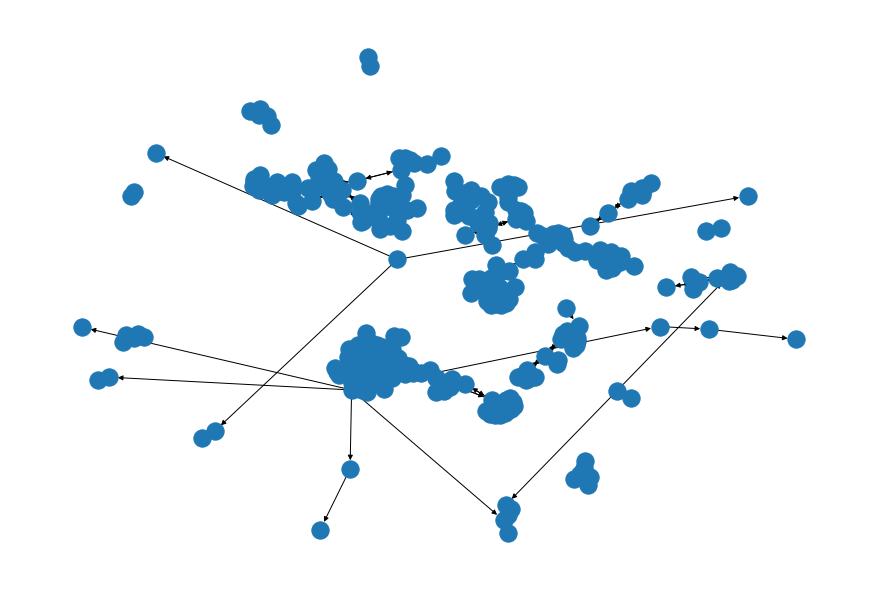

In [ ]:
plt.figure(figsize=(12,8))
nx.draw(G_draw,pos=nx.spring_layout(G_draw),with_labels=False)

In [ ]:
G = nx.from_pandas_edgelist(G_df, 'Source airport ', 'Destination airport ',create_using=nx.DiGraph())

In [ ]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 3069
Number of edges: 31325
Average in degree:  10.2069
Average out degree:  10.2069


In [ ]:
#does a route exist between every two airport? #is every airport reachable from every other airport?
nx.is_strongly_connected(G), nx.is_connected(G.to_undirected())


(False, False)

**WEAKLY AND STRONGLY CONNECTED COMPONENTS**


3054


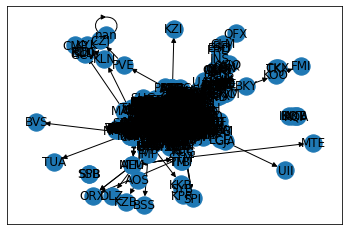

In [ ]:
#How many nodes are in the largest (in terms of nodes) weakly connected component?
wccs = nx.weakly_connected_components(G)
x=len(max(wccs, key=len))
print(x)
nx.draw_networkx(G)



3010


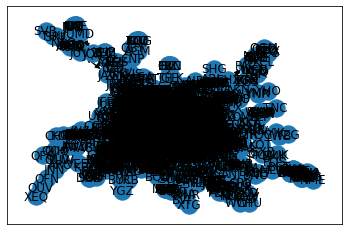

In [ ]:
#How many nodes are in the largest (in terms of nodes) strongly connected component?
sccs = nx.strongly_connected_components(G)
x=len(max(sccs, key=len))
print(x)
nx.draw_networkx(G_sc)


**Average path length**


In [ ]:
scc_subs = (G.subgraph(c) for c in nx.strongly_connected_components(G))
G_sc = max(scc_subs, key=len) #the largest strongly connected subgraph
shortest_sc=nx.average_shortest_path_length(G_sc)
shortest_sc

4.13831473464435

In [ ]:
wcc_subs = (G.subgraph(c) for c in nx.weakly_connected_components(G))
G_wc = max(wcc_subs, key=len) #the largest weakly connected subgraph
shortest_wc=nx.average_shortest_path_length(G_wc)
shortest_wc

4.101150360226267

**Diameter and radius**



1.   The diameter represents the greatest possible no of airports between any two airports .
2.   The radius represents an airport from which every other airport is at a minimum no of airports apart




In [ ]:
diameter=nx.diameter(G_sc)
diameter

14

In [ ]:
radius=nx.radius(G_sc)
radius

7

**Periphery and Center**

In [ ]:
per=nx.periphery(G_sc)
per

['YZG', 'XEQ', 'KCG']

In [ ]:
airport_df.loc[airport_df['IATA'].isin(per)]

,Airport ID,City,Country,IATA
4241,5535,Salluit,Canada,YZG


In [ ]:
cen=nx.center(G_sc)
cen

['CPH', 'KEF']

In [ ]:
airport_df.loc[airport_df['IATA'].isin(cen)]

,Airport ID,City,Country,IATA
15,16,Keflavik,Iceland,KEF
601,609,Copenhagen,Denmark,CPH


**Which node in G_sc is connected to the most other nodes by a shortest path of length equal to the radius of G_sc**

In [ ]:
d = radius
max_count = -1
result_node = None
for node in cen:
    count = 0
    sp = nx.shortest_path_length(G_sc, node)
    for key, value in sp.items():
        if value == radius:
            count += 1        
    if count > max_count:
        result_node = node
        max_count = count

result_node, max_count

('KEF', 8)

In [ ]:
airport_df.loc[airport_df['IATA'] == result_node]

,Airport ID,City,Country,IATA
15,16,Keflavik,Iceland,KEF


**Indegree and Outdegree**

**What are the top and bottom 5 airports with most incoming flights?**

In [ ]:
in_deg=nx.in_degree_centrality(G_sc)

In [ ]:
top5=sorted(in_deg.items(), key=operator.itemgetter(1),reverse=True)[:5]
l=[]
for i,j in top5:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]

,Airport ID,City,Country,IATA
336,340,Frankfurt,Germany,FRA
574,580,Amsterdam,Netherlands,AMS
1346,1382,Paris,France,CDG
3170,3364,Beijing,China,PEK
3482,3682,Atlanta,United States,ATL


In [ ]:
bot5=sorted(in_deg.items(), key=operator.itemgetter(1))[:5]
l=[]
for i,j in bot5:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]

,Airport ID,City,Country,IATA
2648,2786,Ayacucho,Peru,AYP
5246,6922,Kirensk,Russia,KCK
5247,6924,Ust-Kut,Russia,UKX
5254,6932,Taganrog,Russia,TGK
6404,8944,Bodaibo,Russia,ODO


**What are the top and bottom 5 airports with most outgoing flights?**

In [ ]:
out_deg=nx.out_degree_centrality(G_sc)

In [ ]:
top5=sorted(out_deg.items(), key=operator.itemgetter(1),reverse=True)[:5]
top5

[('FRA', 0.07544034562977733),
 ('AMS', 0.07377866400797607),
 ('ATL', 0.0721169823861748),
 ('CDG', 0.07012296444001329),
 ('PEK', 0.06779661016949153)]

In [ ]:
l=[]
for i,j in top5:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]

,Airport ID,City,Country,IATA
336,340,Frankfurt,Germany,FRA
574,580,Amsterdam,Netherlands,AMS
1346,1382,Paris,France,CDG
3170,3364,Beijing,China,PEK
3482,3682,Atlanta,United States,ATL


In [ ]:
bot5=sorted(out_deg.items(), key=operator.itemgetter(1))[:5]
bot5

[('TGK', 0.00033233632436025255),
 ('KCK', 0.00033233632436025255),
 ('ODO', 0.00033233632436025255),
 ('UKX', 0.00033233632436025255),
 ('AYP', 0.00033233632436025255)]

In [ ]:
l=[]
for i,j in bot5:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]

,Airport ID,City,Country,IATA
2648,2786,Ayacucho,Peru,AYP
5246,6922,Kirensk,Russia,KCK
5247,6924,Ust-Kut,Russia,UKX
5254,6932,Taganrog,Russia,TGK
6404,8944,Bodaibo,Russia,ODO


**Closeness Centrality**


**Which airports will allow you to reach all other airports with the lowest average number of airports in between?**

In [ ]:
closeness = nx.closeness_centrality(G_sc, wf_improved=True)

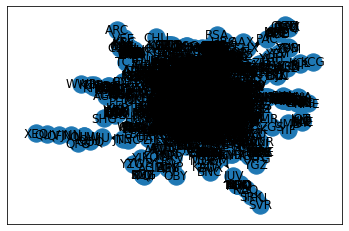

In [ ]:
close=sorted(closeness.items(), key=operator.itemgetter(1),reverse=True)[:5]
l=[]
for i,j in close:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]
nx.draw_networkx(G_sc)

**Which airports will make you reach all other airports with the highest average number of airports in between?**

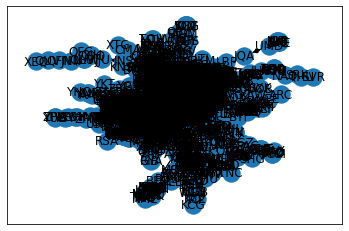

In [ ]:
close=sorted(closeness.items(), key=operator.itemgetter(1))[:18]
l=[]
for i,j in close:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]
nx.draw_networkx(G_sc)

**Betweenness Centrality**

**Which airports often act as bridges between other pairs of airports?**

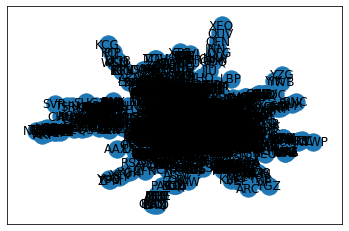

In [ ]:
betweeness = nx.betweenness_centrality(G_sc, normalized=True)
close=sorted(betweeness.items(), key=operator.itemgetter(1),reverse=True)[:5]
l=[]
for i,j in close:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]
nx.draw_networkx(G_sc)

**PageRank**

**5 airports with highest and lowest pagerank?**

Important airports based on highest number of connections within shortest path 

In [ ]:
pr = nx.pagerank(G_sc, alpha=0.85)
pager=sorted(pr.items(), key=operator.itemgetter(1),reverse=True)[:5]
l=[]
for i,j in pager:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]

,Airport ID,City,Country,IATA
336,340,Frankfurt,Germany,FRA
574,580,Amsterdam,Netherlands,AMS
3170,3364,Beijing,China,PEK
3470,3670,Dallas-Fort Worth,United States,DFW
3482,3682,Atlanta,United States,ATL


In [ ]:
pager=sorted(pr.items(), key=operator.itemgetter(1))[:5]
l=[]
for i,j in pager:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]

,Airport ID,City,Country,IATA
307,310,Ostend,Belgium,OST
604,612,Karup,Denmark,KRP
610,618,Ronne,Denmark,RNN
611,619,Soenderborg,Denmark,SGD
5600,7459,Lleida,Spain,ILD


**Identifying hubs and authorities**

In [ ]:
hits = nx.hits(G_sc)

In [ ]:
hubs=sorted(hits[0].items(), key=operator.itemgetter(1))[:5]
l=[]
for i,j in hubs:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]

,Airport ID,City,Country,IATA
5374,7094,Kasigluk,United States,KUK
5388,7116,Central,United States,CEM
5461,7246,Manley Hot Springs,United States,MLY


In [ ]:
auth=sorted(hits[1].items(), key=operator.itemgetter(1))[:5]
l=[]
for i,j in auth:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]

,Airport ID,City,Country,IATA
3224,3423,Tatalina,United States,TLJ
3231,3430,Port Moller,United States,PTU
5456,7236,Circle,United States,IRC


**FLIGHT FARE PREDICTION**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from prettytable import PrettyTable

In [ ]:
t_df = pd.read_csv("/content/routes1.csv")

In [ ]:
t_df.columns

Index(['Airline', 'Airline ID', 'Source airport ID', 'Source airport ',
       'Destination airport ID', 'Destination airport ', 'Codeshare', 'Stops',
       'Equipment', 'Price', 'Source', 'Destination', 'Date_of_Journey'],
      dtype='object')

In [ ]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airline                 49999 non-null  object 
 1   Airline ID              49999 non-null  object 
 2   Source airport ID       49999 non-null  object 
 3   Source airport          49999 non-null  object 
 4   Destination airport ID  49999 non-null  object 
 5   Destination airport     49999 non-null  object 
 6   Codeshare               49999 non-null  object 
 7   Stops                   49999 non-null  float64
 8   Equipment               49982 non-null  object 
 9   Price                   49999 non-null  float64
 10  Source                  49999 non-null  object 
 11  Destination             49999 non-null  object 
 12  Date_of_Journey         49999 non-null  object 
dtypes: float64(2), object(11)
memory usage: 5.3+ MB


In [ ]:
t_df.describe()

,Stops,Price
count,49999.000000,49999.000000
mean,0.000160,9069.891158
std,0.012648,4583.603750
min,0.000000,1759.000000
25%,0.000000,5228.000000
50%,0.000000,8366.000000
75%,0.000000,12373.000000
max,1.000000,79512.000000


In [ ]:
t_df.isnull().head()

,Airline,Airline ID,Source airport ID,Source airport,Destination airport ID,Destination airport,Codeshare,Stops,Equipment,Price,Source,Destination,Date_of_Journey
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
t_df.isnull().sum()

Airline                   3416
Airline ID                3416
Source airport ID         3416
Source airport            3416
Destination airport ID    3416
Destination airport       3416
Codeshare                 3416
Stops                     3416
Equipment                 3433
Price                     3416
Source                    3416
Destination               3416
Date_of_Journey           3416
dtype: int64

In [ ]:
t_df.dropna(inplace = True)

In [ ]:
t_df[t_df.duplicated()].head()

,Airline,Airline ID,Source airport ID,Source airport,Destination airport ID,Destination airport,Codeshare,Stops,Equipment,Price,Source,Destination,Date_of_Journey


In [ ]:
t_df.drop_duplicates(keep='first',inplace=True)
t_df.head()

,Airline,Airline ID,Source airport ID,Source airport,Destination airport ID,Destination airport,Codeshare,Stops,Equipment,Price,Source,Destination,Date_of_Journey
0,IndiGo,2B,410,AER,2965,KZN,2990,0.0,CR2,3897.0,Banglore,New Delhi,24/03/2019
1,Air India,2B,410,ASF,2966,KZN,2990,0.0,CR2,7662.0,Kolkata,Banglore,1/05/2019
2,Jet Airways,2B,410,ASF,2966,MRV,2962,0.0,CR2,13882.0,Delhi,Cochin,9/06/2019
3,IndiGo,2B,410,CEK,2968,KZN,2990,0.0,CR2,6218.0,Kolkata,Banglore,12/05/2019
4,IndiGo,2B,410,CEK,2968,OVB,4078,0.0,CR2,13302.0,Banglore,New Delhi,01/03/2019


In [ ]:
t_df.shape

(49982, 13)

In [ ]:
t_df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

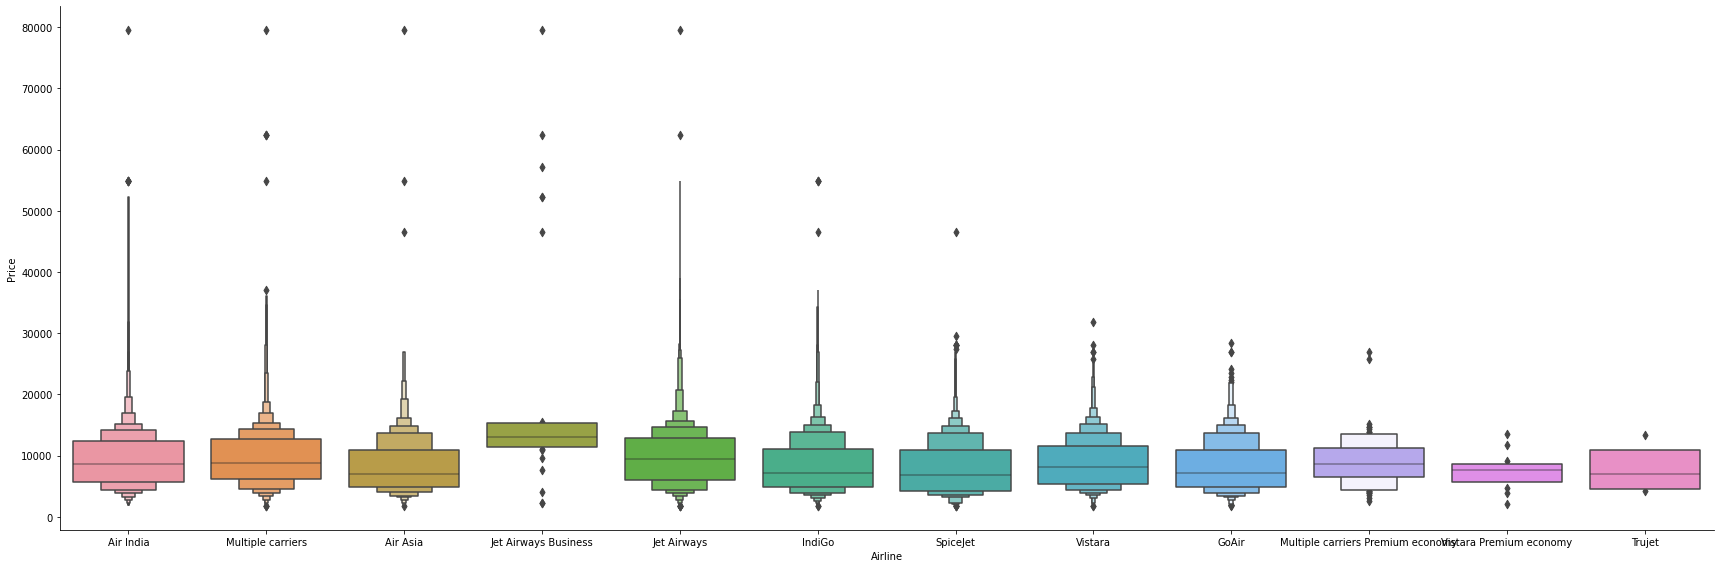

In [ ]:
sns.catplot(y = "Price", x = "Airline", data = t_df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

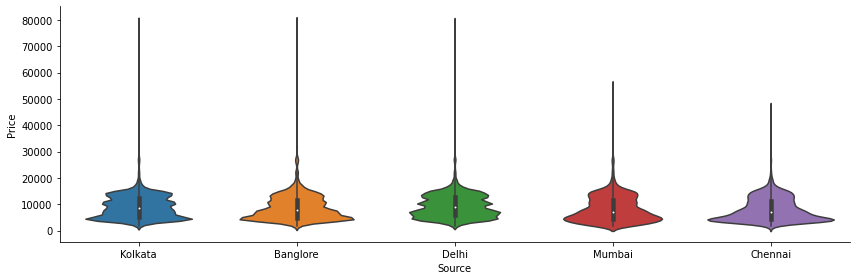

In [ ]:
sns.catplot(y = "Price", x = "Source", data = t_df.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

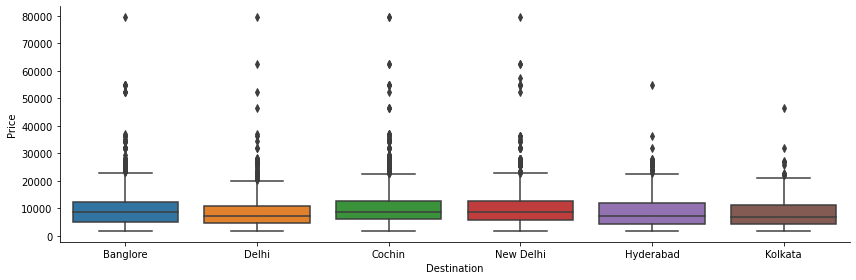

In [ ]:
sns.catplot(y = "Price", x = "Destination", data = t_df.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

In [ ]:
t_df.head()

,Airline,Airline ID,Source airport ID,Source airport,Destination airport ID,Destination airport,Codeshare,Stops,Equipment,Price,Source,Destination,Date_of_Journey
0,IndiGo,2B,410,AER,2965,KZN,2990,0.0,CR2,3897.0,Banglore,New Delhi,24/03/2019
1,Air India,2B,410,ASF,2966,KZN,2990,0.0,CR2,7662.0,Kolkata,Banglore,1/05/2019
2,Jet Airways,2B,410,ASF,2966,MRV,2962,0.0,CR2,13882.0,Delhi,Cochin,9/06/2019
3,IndiGo,2B,410,CEK,2968,KZN,2990,0.0,CR2,6218.0,Kolkata,Banglore,12/05/2019
4,IndiGo,2B,410,CEK,2968,OVB,4078,0.0,CR2,13302.0,Banglore,New Delhi,01/03/2019


In [ ]:
t_df["Journey_day"] = t_df['Date_of_Journey'].str.split('/').str[0].astype(int)
t_df["Journey_month"] = t_df['Date_of_Journey'].str.split('/').str[1].astype(int)
t_df.drop(["Date_of_Journey"], axis = 1, inplace = True)

Plotting Bar chart for Months (Duration) vs Number of Flights

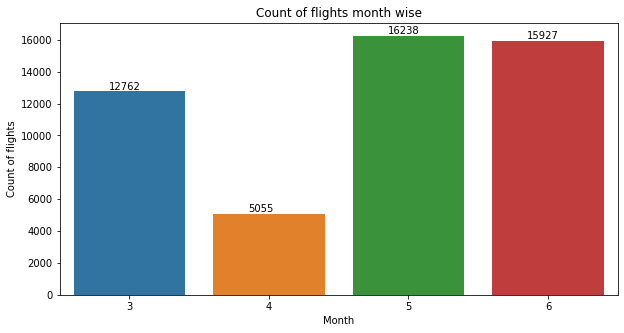

In [ ]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = t_df)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

Plotting Bar chart for Types of Airline vs Number of Flights

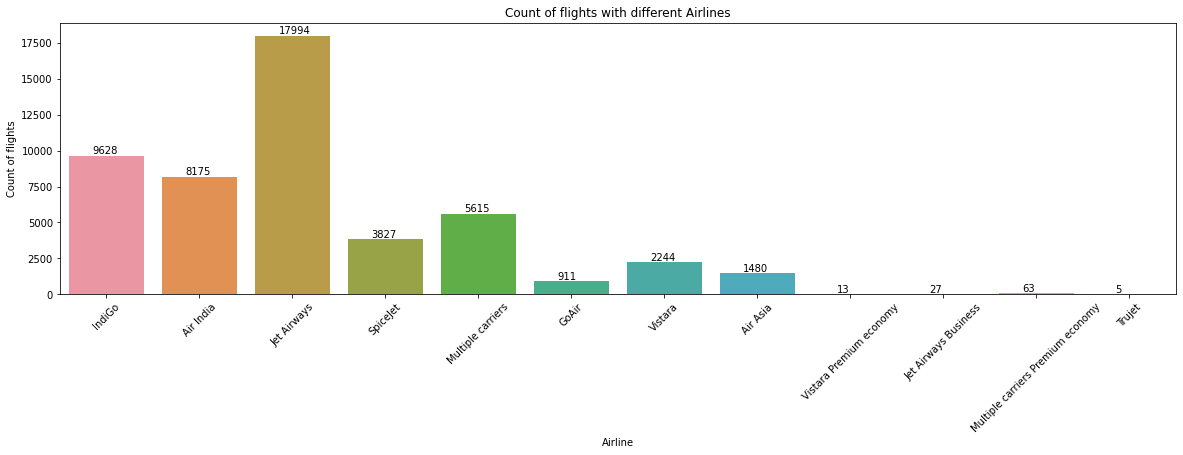

In [ ]:
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =t_df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

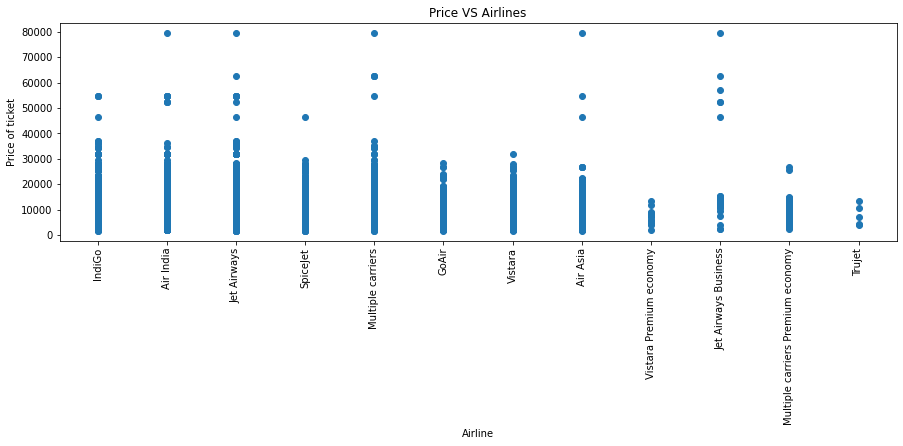

In [ ]:
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(t_df['Airline'], t_df['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

Plotting Ticket Prices VS Airlines

**CLUSTERING BASED ON AIR TRAFFIC ON AIRLINES**

In [ ]:
df = pd.read_csv("/content/Air_Traffic_Passenger_Statistics.csv")
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


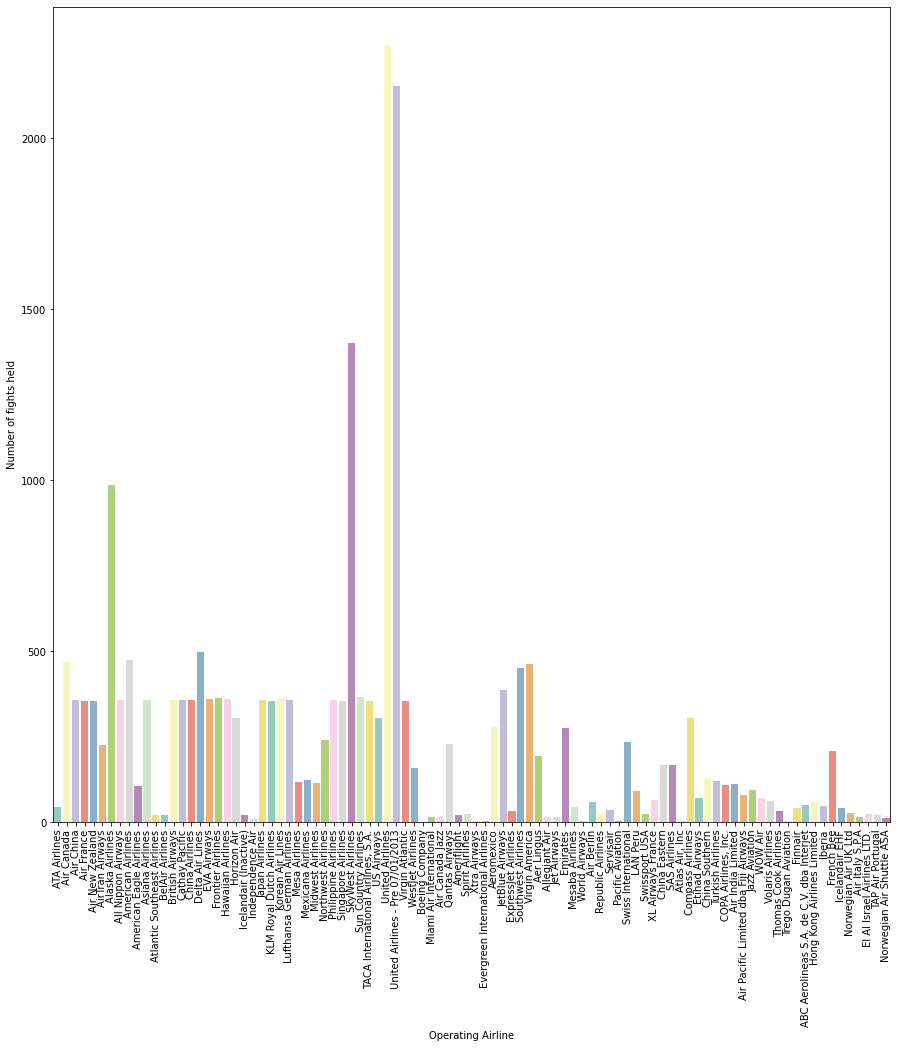

In [ ]:
plt.figure(figsize = (15,15))
sns.countplot(x = "Operating Airline", palette = "Set3",data = df)
plt.xticks(rotation = 90)
plt.ylabel("Number of fights held")
plt.show()

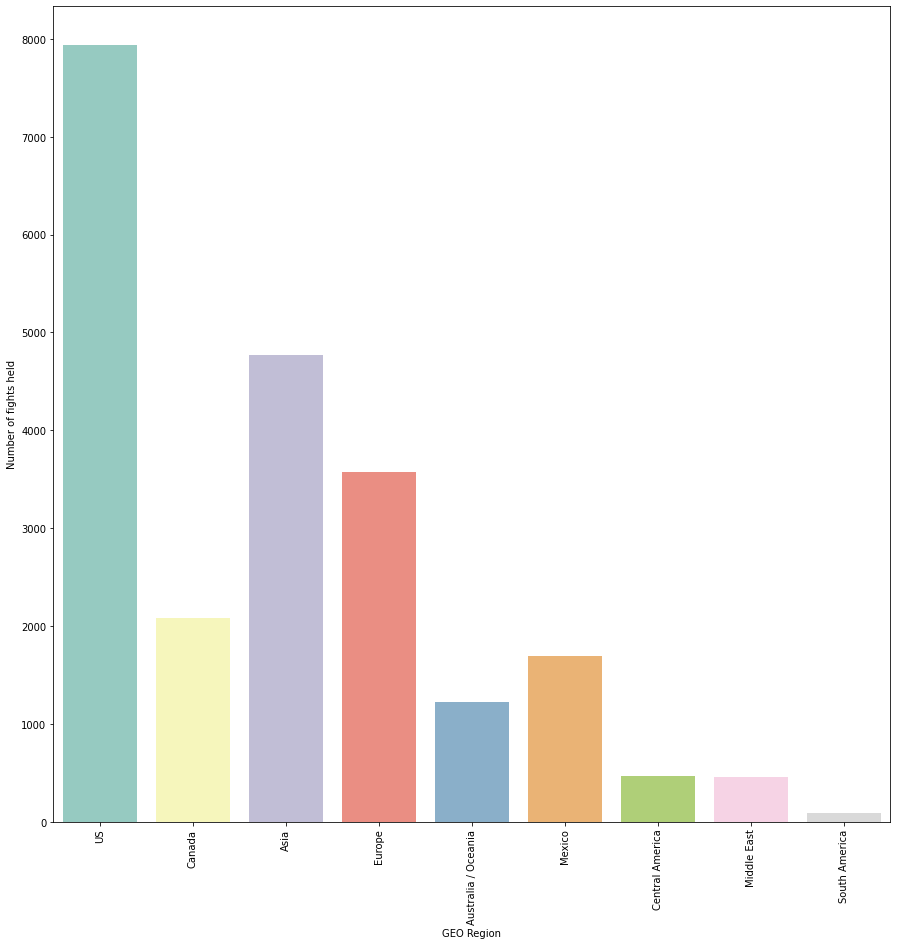

In [ ]:
plt.figure(figsize = (15,15))
sns.countplot(x = "GEO Region", palette = "Set3",data = df)
plt.xticks(rotation = 90)
plt.ylabel("Number of fights held")
plt.show()

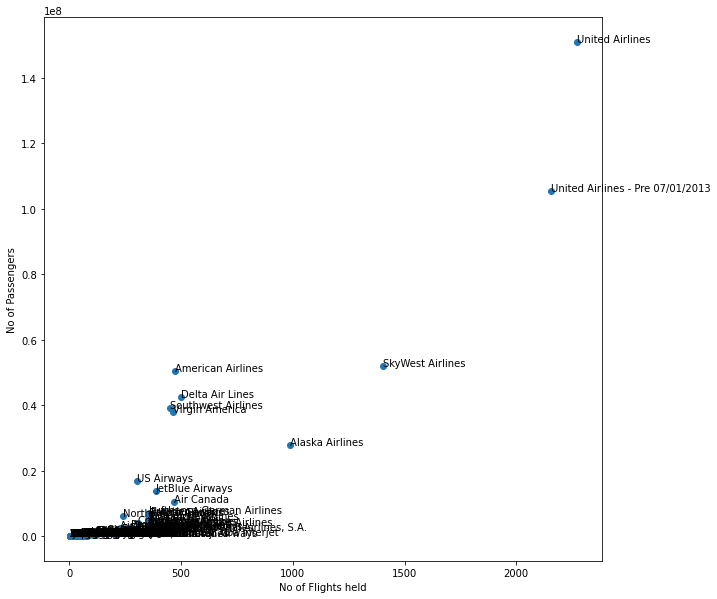

In [ ]:
flight_count = df["Operating Airline"].value_counts()
flight_count.sort_index(inplace=True)
traveler_count = df.groupby("Operating Airline").sum()["Passenger Count"]
traveler_count.sort_index(inplace=True)
from sklearn.preprocessing import scale
x = flight_count.values
y = traveler_count.values
plt.figure(figsize = (10,10))
plt.scatter(x, y)
plt.xlabel("No of Flights held")
plt.ylabel("No of Passengers")
for i, txt in enumerate(flight_count.index.values):
    plt.annotate(txt, (x[i], y[i]))
plt.show()

**DROPPING OUTLIERS** 

In [ ]:
df_1 = flight_count + traveler_count
df_1.sort_values(ascending = False, inplace = True)
outliers = df_1.head(2).index.values
flight_count = flight_count.drop(outliers)
flight_count.sort_index(inplace=True)
traveller_count = traveler_count.drop(outliers)
traveler_count.sort_index(inplace = True)
x = traveler_count.values
y = traveler_count.values

**ELBOW** **METHOD**

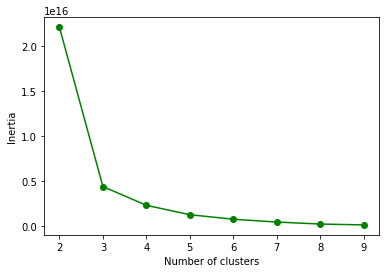

In [ ]:
inertias = []
z = np.array(list(zip(x,y)))
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(z)
    inertias.append(kmeans.inertia_)
plt.plot(range(2,10), inertias, "o-g")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

**GROUPIING INTO CLUSTERS**

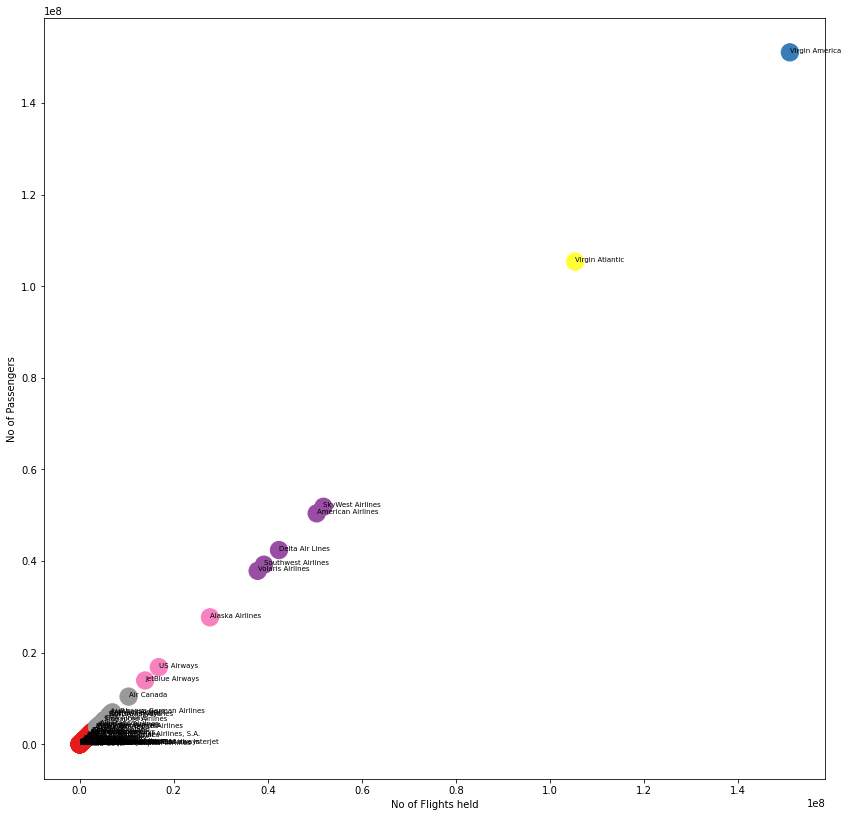

In [ ]:
km = KMeans(n_clusters=6)
km.fit(z)
y_km = km.predict(z)
plt.figure(figsize = (14,14))
plt.xlabel("No of Flights held")
plt.ylabel("No of Passengers")
plt.scatter(z[:, 0], z[:, 1], c=y_km, s=300, cmap='Set1')
for i, txt in enumerate(flight_count.index.values):
    plt.annotate(txt, (z[i,0], z[i,1]), size = 7)
plt.show()